<a href="https://colab.research.google.com/github/ShreeKeshavan/Machine_Learning/blob/main/Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**

### **Basics Of Linear Regression**

8.013459823238465 10.76915592313307


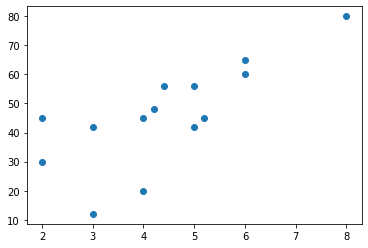

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

x = [2,3,4,4.4,5,5.2,4.2,6.0,8,5,6,2,3,4]
y = [30,42,45,56,42,45,48,60,80,56,65,45,12,20] #Data set

slope, intercept,r,p,std_err = stats.linregress(x,y) #To calculate the slope,intercept of the best line , R, P, standard error using scipy.
print(slope,intercept)

plt.scatter(x,y) #To plot the scatter of x,y 
plt.show()





[26.79607556961, 34.80953539284847, 42.82299521608693, 46.02837914538232, 50.836455039325394, 52.43914700397309, 44.42568718073463, 58.849914862563864, 74.87683450904079, 50.836455039325394, 58.849914862563864, 26.79607556961, 34.80953539284847, 42.82299521608693]


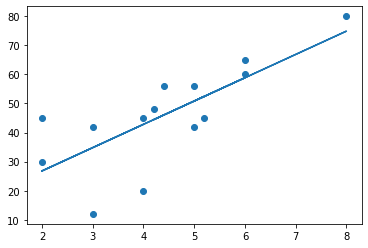

In [ ]:
def myfunc(x,slope,intercept): #To find (y = mx+c) x is m, slope is x, intercept is c.
  return x*slope+intercept #To find y 

slope, intercept,r,p,std_err = stats.linregress(x,y) #To calculate the slope,intercept of the best line , R, P, standard error using scipy.

new_y = []
for x_value in x:
  temp_y = myfunc(x_value,slope,intercept)
  new_y.append(temp_y)
print(new_y) #To find the new y (predicted y)

plt.scatter(x,y)
plt.plot(x,new_y) #Plot the new_y (minimum error line)
plt.show() 


# **SCORE DATA SET**

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


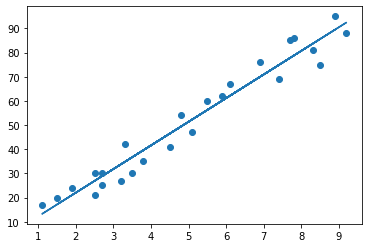

In [ ]:
#SCORE_DATASET (simple_linear_Regression)
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

df = pd.read_csv("/content/score.csv")
print(df) 

X = df['Hours'].values
y = df['Scores'].values
slope,intercept,r,p,Std_err = stats.linregress(X,y)#To find (y = mx+c) x is m, slope is x, intercept is c, r is distance of plot from line,

def myfunc(x):
  return slope*x +intercept #(y = mx+c)

predicted_y = []
for x_value in X:
  predicted_y.append(myfunc(x_value)) # Precting the minimum error line

plt.scatter(X,y)
plt.plot(X,predicted_y) #Plotting the minmum error line
plt.show()


### **Finding Rscore,Intercept**

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

x = np.array([2,3,4,5,1,5,6,7,8,9,10]).reshape(-1,1) #the data should need to be in array while fit
y = np.array([23,45,23,45,26,67,87,45,67,23,45])

lr = LinearRegression()
lr.fit(x,y)
print("score for regression : ",lr.score(x,y))#To find the R score
print("LR intercept : ",lr.intercept_) #to find the intercept


score for regression :  0.08960110378080532
LR intercept :  32.98901098901099


# **Tv_Marketing Data set**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/tvmarketing.csv")

In [ ]:
print(df.info()) #Information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB
None


In [ ]:
print(df.describe()) #Description of the data

               TV       Sales
count  200.000000  200.000000
mean   147.042500   14.022500
std     85.854236    5.217457
min      0.700000    1.600000
25%     74.375000   10.375000
50%    149.750000   12.900000
75%    218.825000   17.400000
max    296.400000   27.000000


<AxesSubplot:xlabel='TV', ylabel='Sales'>

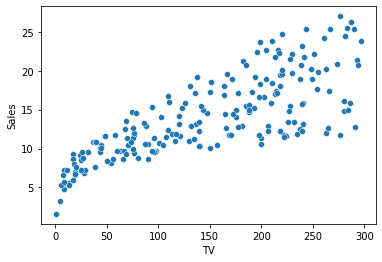

In [ ]:
sns.scatterplot(data=df, x="TV", y="Sales")

In [ ]:
#Line formula - y = m1x1+m0 
# Equation for this dataset - Sales = m1*TV+m0
X = df[["TV"]] 
Y = df["Sales"]

#Splitting 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0) #can give anyone test_size or train_size 

lr = LinearRegression() #creating object 
lr.fit(X_train,Y_train) #Always use train data in fit

print("score for regression : ",lr.score(X_train,Y_train))#To find the R score
print("LR intercept : ",lr.intercept_) #to find the intercept
print("Coeff : ", lr.coef_ ) #slope

score for regression :  0.5552336104251212
LR intercept :  7.310810165411681
Coeff :  [0.04581434]


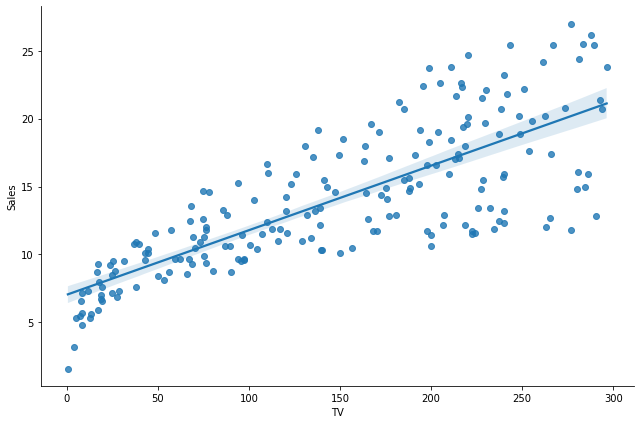

In [ ]:
#Prediction
Y_predicted = lr.predict(X_train) 
sns.lmplot(x ='TV', y = 'Sales', data=df,aspect=1.5,height=6) #To visualise prediction using lmplot

In [ ]:
#computating the Train ERROR
print(sum(abs(Y_train - Y_predicted))/len(Y_train)) # formula of mean of the error - sum(predicted - actual)2/n

2.782980807882148


In [ ]:
# Predicting test data
y_test_predicted = lr.predict(X_test)

In [ ]:
#Computating the Test ERROR
print(sum(abs(Y_test - y_test_predicted))/len(Y_test)) # formula of mean of the error - sum(predicted - actual)2/n

2.0575465794300083
